In [2]:
import numpy as np
import pandas as pd

In [4]:
def annualize_vol(rets,  periods_per_year=12):
    sdev = rets.std()
    return sdev*np.sqrt(periods_per_year)

def annualize_return(rets, periods_per_year=12):
    ret_acc = (1+rets).prod()
    return ret_acc**(periods_per_year/rets.shape[0]) - 1

def sharpe_ratio(r, riskfree_rate, periods_per_year):
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_return(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol

<Axes: >

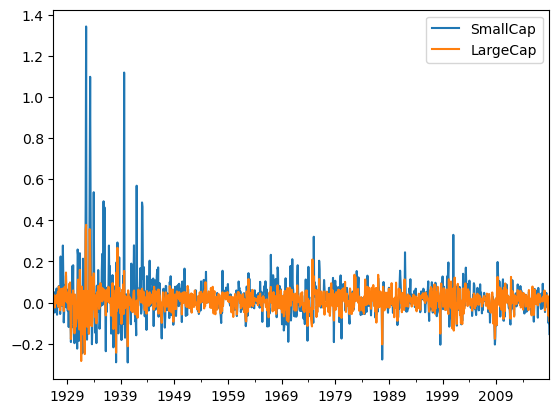

In [6]:
me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100


rets.index = pd.to_datetime(rets.index, format="%Y%m")
rets.index = rets.index.to_period('M')

rets.plot.line()

In [7]:
rets.loc["2000":"2008"]

,SmallCap,LargeCap
2000-01,0.1365,-0.0378
2000-02,0.1950,-0.0559
2000-03,-0.0194,0.1135
2000-04,-0.1173,-0.0062
2000-05,-0.0741,0.0139
...,...,...
2008-08,0.0110,0.0087
2008-09,-0.1274,-0.1155
2008-10,-0.2041,-0.1763
2008-11,-0.1650,-0.0735


<Axes: >

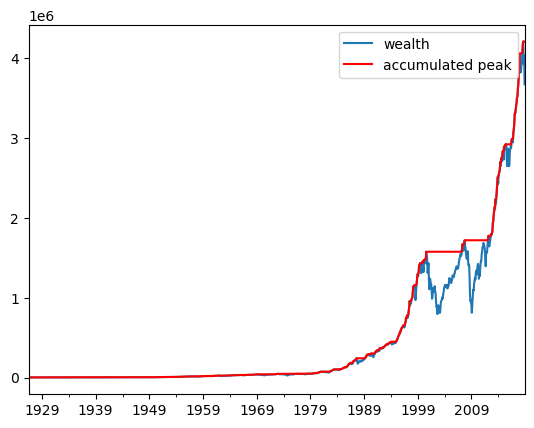

In [12]:
wealth_index = 1000*(1+rets["LargeCap"]).cumprod()
previous_peaks = wealth_index.cummax()


wealth_index.plot(label='wealth', legend = True)
previous_peaks.plot(c='r', label='accumulated peak', legend = True)

<Axes: >

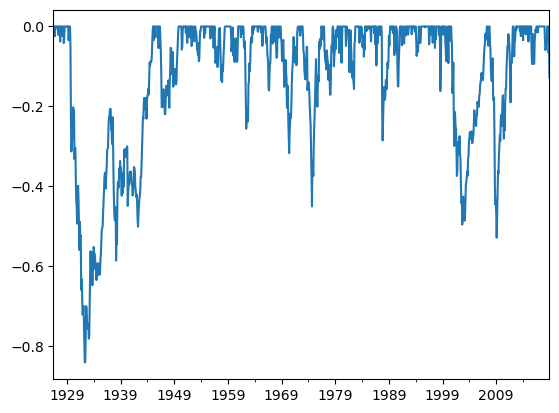

In [13]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [14]:
drawdown.min()

-0.8400375277943123

-0.5280945042309304

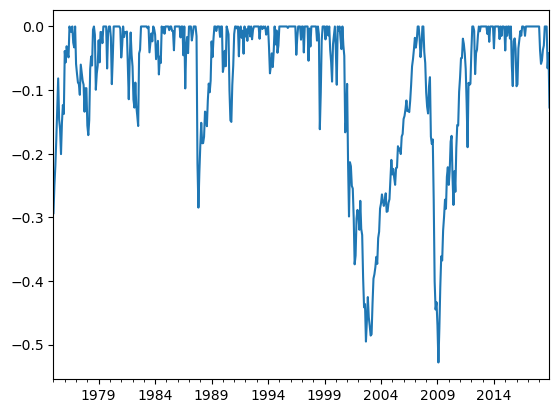

In [15]:
drawdown["1975":].plot()
drawdown["1975":].min()

In [18]:
def drawdown(return_series):
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return drawdowns.min()

In [19]:
drawdown(rets)

SmallCap   -0.833001
LargeCap   -0.840038
dtype: float64